# Importing the required libraries

numpy|pandas:will aid us in handling the data.
    
matplotlib|seaborn: will assist us in plotting the data so we can visualise it in various ways and better comprehend it.
    
sklearn: will offer all equipment required to train and evaluate our models.
    
math: Will offer certain functions (such as sqrt) that we could find useful while testing our models.
    
prettytable: enables us to plot basic ASCII tables

In [62]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from prettytable import PrettyTable
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,recall_score,precision_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# About the Dataset

The dataset is related to red and white variants of the Portuguese “Vinho Verde” wine. It contains 11 input variables that are based on physicochemical tests of the wine samples, such as acidity, sugar, sulphates, alcohol, etc. It also contains one output variable that is based on sensory data of the wine quality, which is a score between 0 and 10. The dataset can be used for both classification and regression tasks, depending on how we define the quality labels. The dataset has some challenges such as imbalanced classes, irrelevant features, and missing data about grape types, wine brand, or wine price.

Portuguese wine that was produced in the historic Minho area in the country's far north is known as the "Vinho Verde" red wine variation. Finding the characteristics of various types of wine that reveal the most about their quality is the major objective of this problem. We'll also attempt to anticipate a wine's quality and see if it corresponds with the actual quality. We will use regression techniques to resolve this dataset even though it may be seen as a classification (multiclass classification) or a regression problem.

You can find all the data and information on this matter here: https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv

# Input & Output Variables

fixed acidity:The majority of the acids in wine are either fixed or nonvolatile (do not easily evaporate).
    
volatile acidity: the quantity of acetic acid in wine, which can provide an unpleasant vinegar flavour at high amounts.
    
citric acid: Citric acid, which is found in wines in small amounts, can give them a "freshness" and flavour.

residual sugar:It's uncommon to find wines with less than one gram of sugar per litre of wine, and those with more than 45 gram per litre are regarded as sweet.
    
chlorides: how much salt is in the wine.
    
free sulfur dioxide: The free form of SO2 inhibits microbial development and wine oxidation by maintaining equilibrium between molecular SO2 (as a dissolved gas) and the bisulfite ion.

total sulfur dioxide: Amount of free and bound SO2; at low concentrations, SO2 in wine is largely undetected, but at free SO2 concentrations above 50 ppm, SO2 is noticeable in the wine's flavour and aroma.
 
density: Depending on the percentage of alcohol and the amount of sugar in the wine, its density is comparable to that of water.
    
pH:Using a scale from 0 (extremely acidic) to 14 (very basic), the pH scale indicates how acidic or basic a wine is; the majority of wines fall between 3 and 4.
    
sulphates: a wine ingredient that can raise the quantity of sulphur dioxide (S02), an antibacterial and antioxidant.
    
alcohol: the wine's alcohol concentration in percentage.
    
quality: output variable (score between 0 and 10 depending on sensory data).

# Printing the Input data

In this section, we will look for unwanted values like NaN and prepare our dataset so that we can later train our model using accurate data. Additionally, we will examine data types so that, if necessary, we can convert them to numerical numbers.

In [7]:
import pandas as pd
url = "https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv"
df = pd.read_csv(url)
df.to_csv("winequality-red.csv", index=False)


In [30]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Describing the data

In [31]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [85]:
#Examining the dataset's structure to determine how many rows and columns it has.
df.shape

(1599, 12)

# Printing the Information About The Data

As we can see, certain columns' names contain spaces, which is something we really don't want while handling data. As a result, we're going to substitute "_" for these spaces.

In [84]:
#Using _ in lieu of spaces for each column.
df.columns = df.columns.str.replace(' ', '_')

In [83]:
#We make sure there are no empty fields or object data types.
wine.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 143.8 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

From the above information we can infer that there is no null vales present in the data above

# Plotting the Bar Graph of the Data

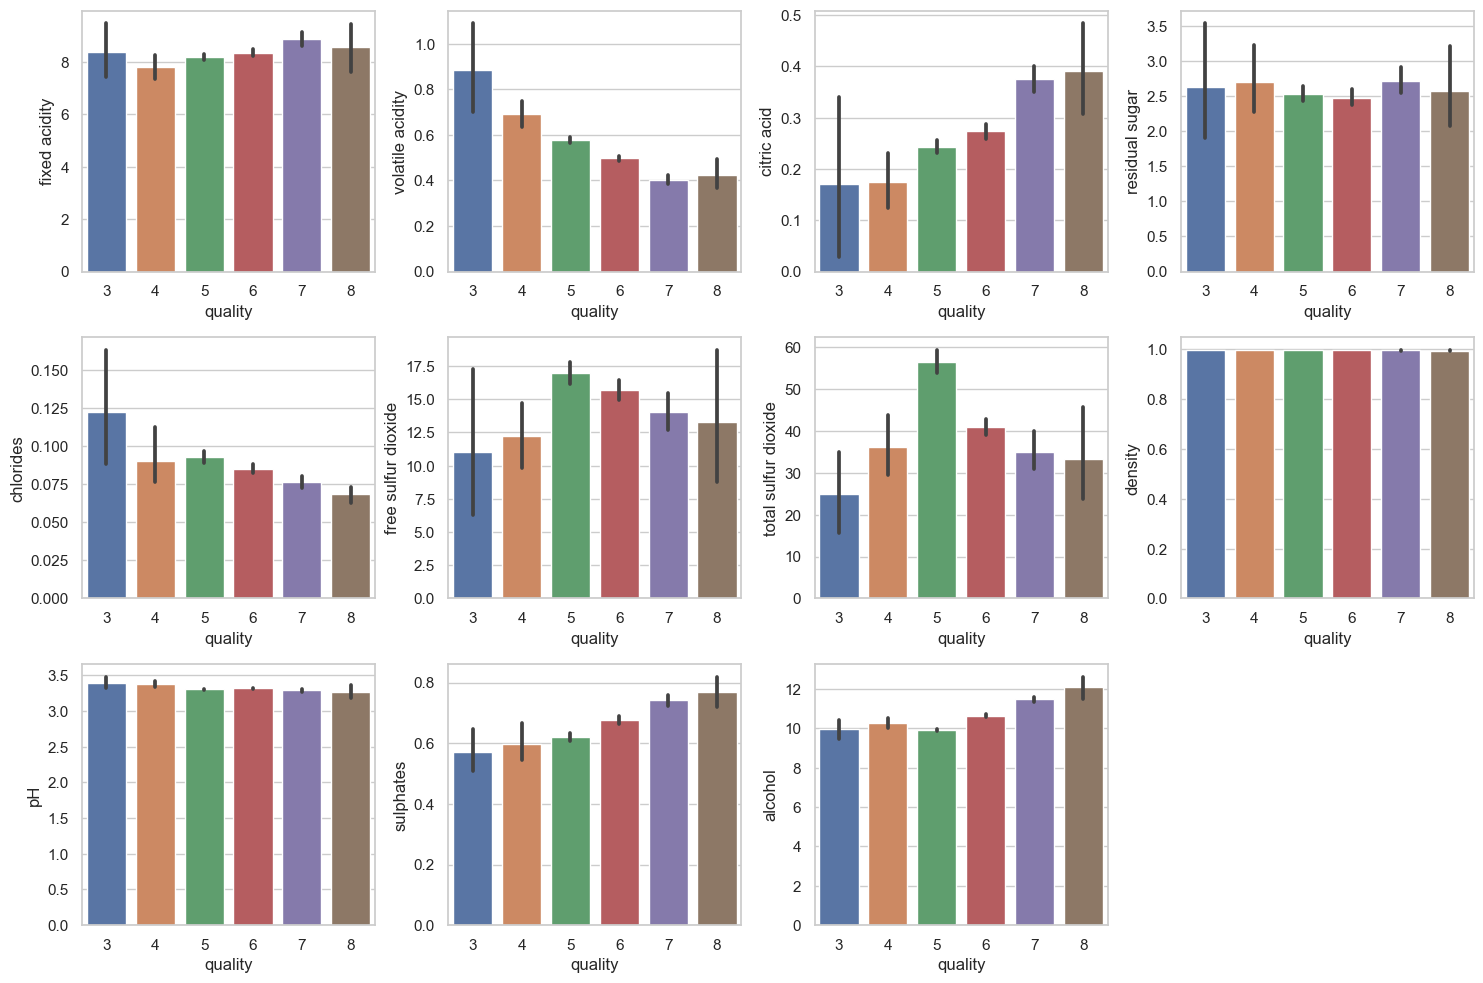

In [33]:
fig = plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=wine)

plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=wine)

plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=wine)

plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=wine)

plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=wine)

plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=wine)

plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=wine)

plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=wine)

plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=wine)

plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=wine)

plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=wine)

plt.tight_layout()

From the barplots above we can conclude that:
When volatile acidity is low, quality is good.
When citric acid levels are high, quality is good.
When chlorides are low, quality is excellent.
When sulphates are higher, quality is higher.
When there is more alcohol, quality is higher.

# Counting the number of each class's occurrences.

In [34]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

--We can see that we have 6 quality classes, numbered 3,4,5,6,7, and 8, but this is not how we want it.

--Therefore, we shall classify all ratings between 3 and 6 as BAD and all ratings between 7 and 8 as GOOD.

# Only including the categories of good and bad.

In [35]:
ranges = (2,6.5,8) 
groups = ['bad','good']
wine['quality'] = pd.cut(wine['quality'],bins=ranges,labels=groups)

---Here, we're categorising the quality, we're cutting into two groups: 2 - 6.5 as BAD, and 6.5 - 8 as GOOD.

# Partitioning 1 for Good and 0 for Bad.

In [36]:
le = LabelEncoder()
wine['quality'] = le.fit_transform(wine['quality'])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


--Changing BAD to 0.

--Changing GOOD to 1.

--Checking the quality column in the illustration above for references we can see the labels with a 0/1 encoding.

# Checking the counts once more.

In [37]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

--The only classes left are 0 and 1, or BAD and GOOD.

--Since it is clear that the data is imbalance, we will attempt to balance it in the following phase.

# Achieving a balance between the two classes.

In [38]:
good_quality = wine[wine['quality']==1]
bad_quality = wine[wine['quality']==0]

bad_quality = bad_quality.sample(frac=1)
bad_quality = bad_quality[:217]

new_df = pd.concat([good_quality,bad_quality])
new_df = new_df.sample(frac=1)
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1043,9.5,0.39,0.41,8.90,0.069,18.0,39.0,0.99859,3.29,0.81,10.9,1
326,11.6,0.53,0.66,3.65,0.121,6.0,14.0,0.99780,3.05,0.74,11.5,1
1090,10.0,0.26,0.54,1.90,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,1
608,10.1,0.65,0.37,5.10,0.110,11.0,65.0,1.00260,3.32,0.64,10.4,0
500,7.8,0.52,0.25,1.90,0.081,14.0,38.0,0.99840,3.43,0.65,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1088,11.6,0.41,0.54,1.50,0.095,22.0,41.0,0.99735,3.02,0.76,9.9,1
585,7.6,0.51,0.24,2.40,0.091,8.0,38.0,0.99800,3.47,0.66,9.6,0
1571,6.4,0.38,0.14,2.20,0.038,15.0,25.0,0.99514,3.44,0.65,11.1,0
1125,8.8,0.24,0.35,1.70,0.055,13.0,27.0,0.99394,3.14,0.59,11.3,1


--We are merely balancing our dataset in this stage.

--We are creating a new data frame called good_quality, in which we will only have information on good wine, or where the quality is 1.

--In a similar way, we are creating for low-quality.

--Using df.sample(frac=1), we are essentially rearranging bad-quality data at that point. It denotes taking a 100% percentage of the data after rearranging it.

--Since we only have 217 samples of good quality, we take away 217 samples of bad quality.

--After that, we will combine the two 217 samples from each class, resulting in a final data frame with 217*2=434 rows.

--Finally, shuffling the data once more to get a balanced set of data.

# Checking the class counts of new dataframe once more.

In [39]:
new_df['quality'].value_counts()

1    217
0    217
Name: quality, dtype: int64

--Now that we can see, both classes have 217 instances, which means that our data has been shuffled up and there are equal values.

# Examining the relationship between the columns

In [20]:
new_df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.527726
sulphates               0.311504
citric acid             0.302600
fixed acidity           0.205071
residual sugar          0.056546
pH                     -0.094291
free sulfur dioxide    -0.099316
density                -0.162949
chlorides              -0.168491
total sulfur dioxide   -0.197056
volatile acidity       -0.387728
Name: quality, dtype: float64

--We may deduce from the above result that the amount of alcohol in the wine has a significant impact on its quality.After learning more about our target variable, we will investigate the relationships between quality and other characteristics to determine which ones are most crucial in determining the quality of a wine.

In [9]:
#Order and calculate correlations.
correlations = df.corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


<AxesSubplot:>

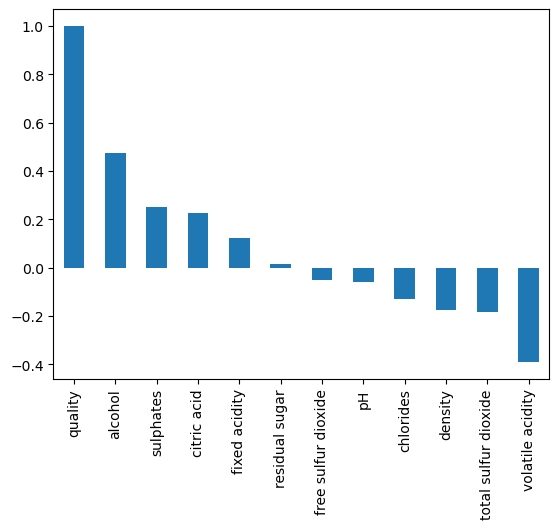

In [10]:
correlations.plot(kind='bar')

# Presenting the relationship between the feature columns graphically

<AxesSubplot:>

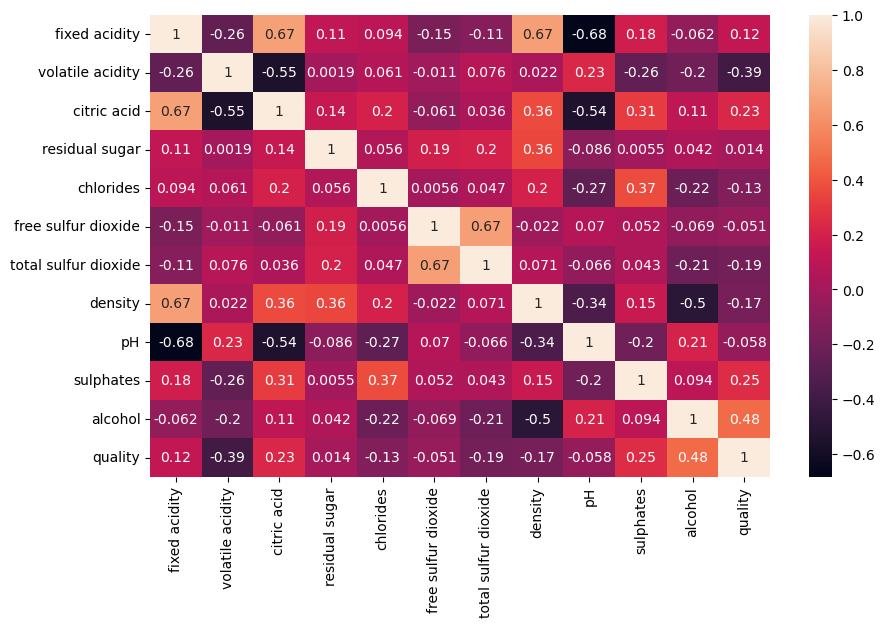

In [8]:
# size of the figure 
fig = plt.figure(figsize = (10,6))

sns.heatmap(df.corr(), annot=True)

In addition to the data we already knew, we can see from this matrix some clear feature relationships, including pH and acidity. In addition, we learn what proportion of the correlations we previously acquired. Additionally, we can see that roughly half of these attributes positively and adversely connect with quality.

We will choose the attributes with the highest numbers out of all of them because they will provide us with more data. Since we do not have to take into account characteristics whose values can be redundant and not provide any information at all, we are going to establish a minimal threshold of correlation approximately about 0.2 (absolute value) in order to achieve this.


In [11]:
print(abs(correlations) > 0.2)

quality                  True
alcohol                  True
sulphates                True
citric acid              True
fixed acidity           False
residual sugar          False
free sulfur dioxide     False
pH                      False
chlorides               False
density                 False
total sulfur dioxide    False
volatile acidity         True
Name: quality, dtype: bool


We have chosen alcohol, sulphates, citric acid, and volatile acidity from among all the values in order to better understand them and see the distribution of values that distinguishes the various attributes.


# % of alcohol

[Text(0.5, 1.0, 'Alcohol Percent in Different Quality Wines')]

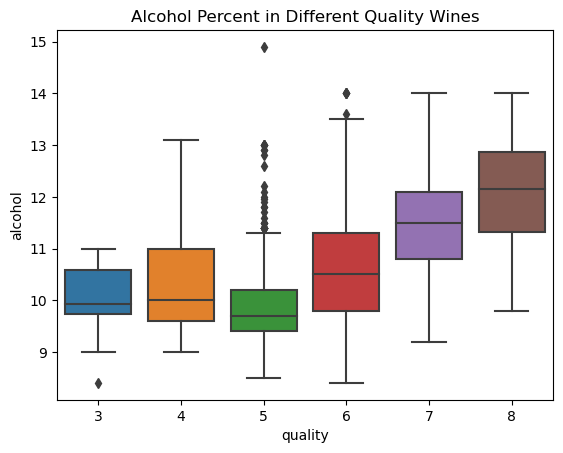

In [12]:
bp = sns.boxplot(x='quality',y='alcohol', data=df)
bp.set(title="Alcohol Percent in Different Quality Wines")

On this boxplot, we can see how wines with lower alcohol content appear to be receiving lower quality ratings while those with higher alcohol content seem to be receiving higher ratings. We can see, however, that "mid quality" wines with ratings of 5 or 6 are exhibiting some odd values. Now let's conduct some additional research:

We will choose a subset of the dataset that only contains rows whose quality column value is 5 or 6, and we will compute correlation coefficients for this subset, in order to understand why we do have these varied values.


In [13]:
df_quality_five_six = df.loc[(df['quality'] >= 5) & (df['quality'] <= 6)]
df_quality_five_six['quality'].value_counts()

5    681
6    638
Name: quality, dtype: int64

In [14]:
correlations_subset = df_quality_five_six.corr()['quality'].sort_values(ascending=False)
print(correlations_subset)

quality                 1.000000
alcohol                 0.375224
sulphates               0.162405
citric acid             0.080146
fixed acidity           0.053447
pH                      0.043065
residual sugar         -0.018452
free sulfur dioxide    -0.060618
chlorides              -0.081813
density                -0.134559
volatile acidity       -0.237193
total sulfur dioxide   -0.239067
Name: quality, dtype: float64


The features that most strongly correspond with quality, according to our calculations for wines with quality ratings of 5 and 6, are the same as those we previously discovered. Even though they are the highest, the differences in values on the boxplot can be explained by their weak link with quality.

<bound method Axes.bar of <AxesSubplot:>>

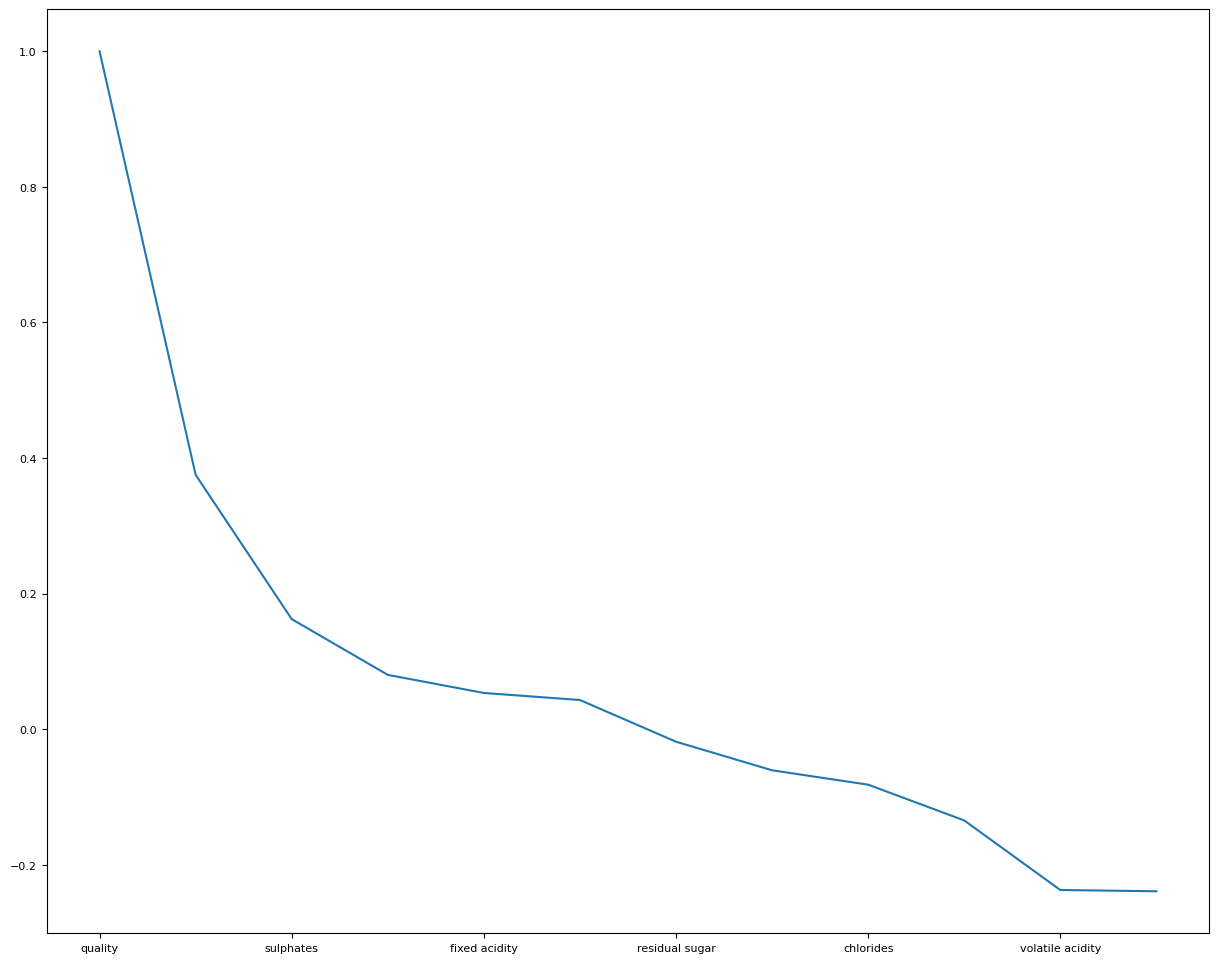

In [76]:
plt.figure (figsize = (15,12))
correlations_subset.plot().bar #visual depiction of the correlation and label

# presence of Sulphates and citric acid

[Text(0.5, 1.0, 'Sulphates in Different Quality Wines')]

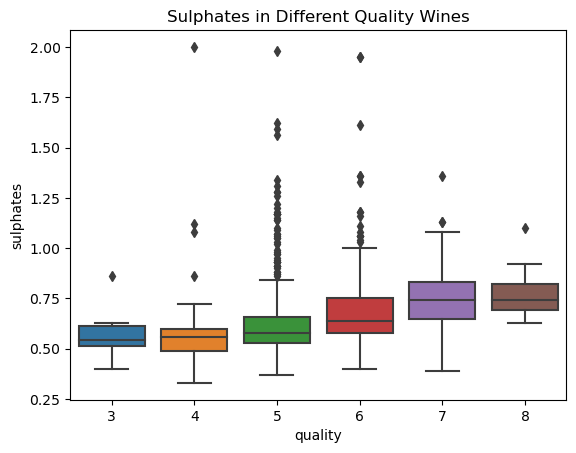

In [15]:
bp = sns.boxplot(x='quality',y='sulphates', data=df)
bp.set(title="Sulphates in Different Quality Wines")

[Text(0.5, 1.0, 'Citric Acid in Different Quality Wines')]

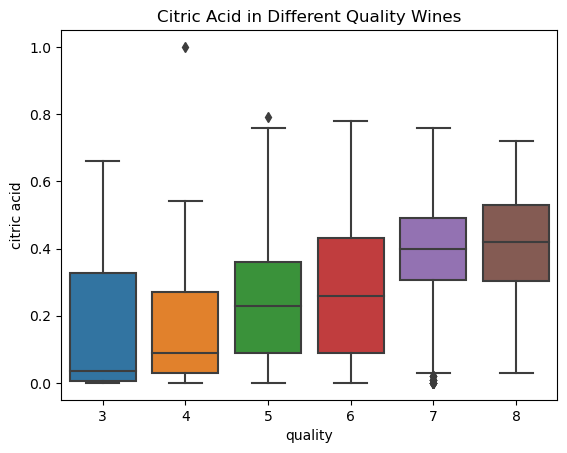

In [21]:
bp = sns.boxplot(x='quality',y='citric acid', data=df)
bp.set(title="Citric Acid in Different Quality Wines")

[Text(0.5, 1.0, 'Acetic Acid Presence in Different Quality Wines')]

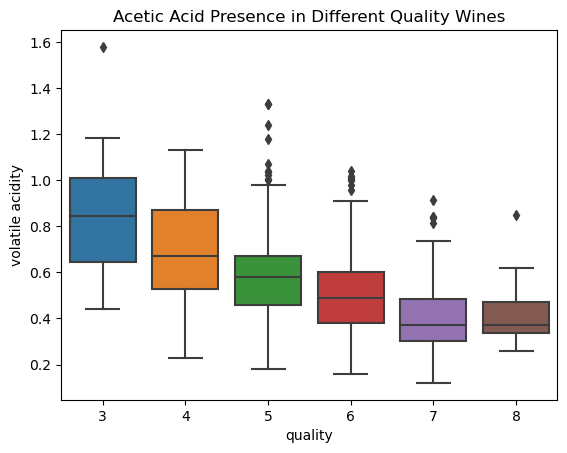

In [20]:
bp = sns.boxplot(x='quality',y='volatile acidity', data=df)
bp.set(title="Acetic Acid Presence in Different Quality Wines")

The relationship between the attributes "sulphates" and "citric_acid" and quality appears to be linearly positive in this example, proving that the correlation coefficients we previously obtained were accurate. Adding more sulphates and citric acid to these wines appears to increase their quality ratings.

# Presence of Acetic Acid 

[Text(0.5, 1.0, 'Acetic Acid Presence in Different Quality Wines')]

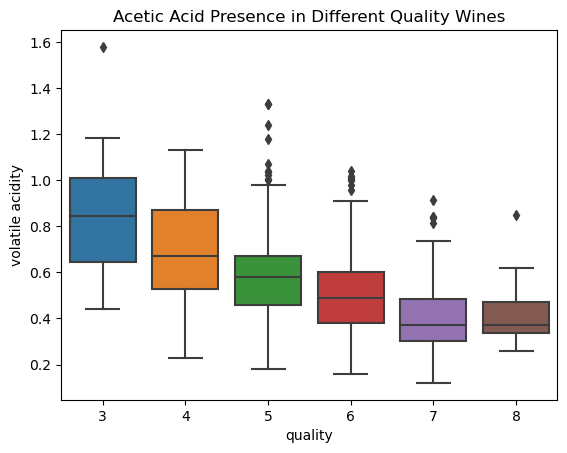

In [23]:
bp = sns.boxplot(x='quality',y='volatile acidity', data=df)
bp.set(title="Acetic Acid Presence in Different Quality Wines")

For the acetic acid content, it is easy to understand how less acetic acid in wine appears favourable while higher values are associated with a poorer rating.

# Additional data visualisation

To see which values correspond to each characteristic, we plotted some box images in the previous subsection. In order to better understand the relationship between the distribution of values from each feature and quality, we will now draw histograms for each of those crucial features for further analysis. To make this process a little bit simpler, we will first divide the quality values into three categories:

Low: includes wines with a quality rating of 3 or 4.

Medium: includes wines with a quality of 5 or 6.

High: includes wines with a quality rating of 7 or 8.

In [24]:
#We recreate our dataframe and divide the quality into various groups.
df_aux = df.copy()
df_aux['quality'].replace([3,4],['low','low'],inplace=True)
df_aux['quality'].replace([5,6],['med','med'],inplace=True)
df_aux['quality'].replace([7,8],['high','high'],inplace=True)

<AxesSubplot:xlabel='quality', ylabel='count'>

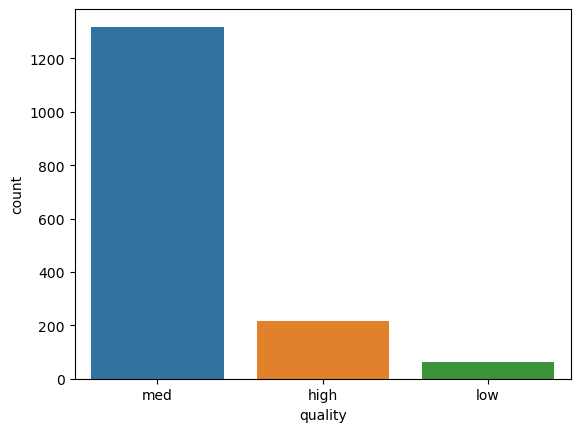

In [25]:
sns.countplot(df_aux['quality'])

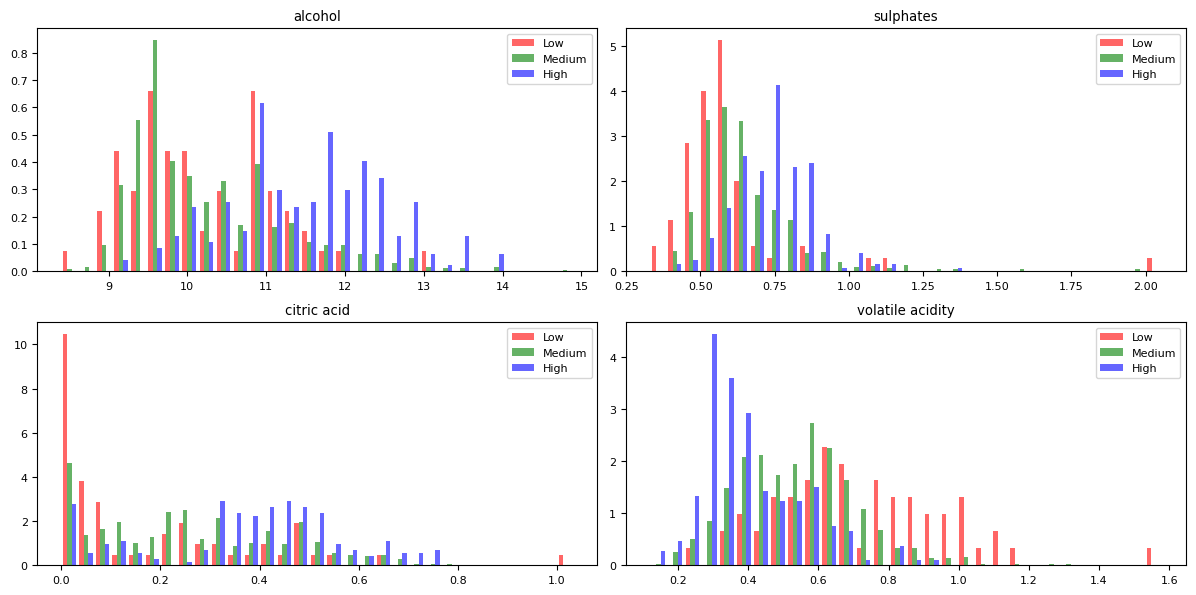

In [28]:
#We included some histograms displaying the values of the features we chose.
flistt = ['alcohol','sulphates','citric acid','volatile acidity']
low = df_aux[df_aux['quality'] == 'low']
medium = df_aux[df_aux['quality'] == 'med']
high = df_aux[df_aux['quality'] == 'high']
plt.rcParams.update({'font.size': 8})
plot, graphs = plt.subplots(nrows= 2, ncols= 2, figsize=(12,6))
graphs = graphs.flatten()
for i, graph in enumerate(graphs):
    graph.figure
    binwidth= (max(df_aux[flistt[i]]) - min(df_aux[flistt[i]]))/30
    bins = np.arange(min(df[flistt[i]]), max(df_aux[flistt[i]]) + binwidth, binwidth)
    graph.hist([low[flistt[i]],medium[flistt[i]],high[flistt[i]]], bins=bins, alpha=0.6, density=True, label=['Low','Medium','High'], color=['red','green','blue'])
    graph.legend(loc='upper right')
    graph.set_title(flistt[i])
plt.tight_layout()

Higher values of alcohol, sulphates, and citric acid appear to be associated with higher quality wines, while larger values of volatile acity are found in lower quality wines, as can be seen in the histograms.

# Feature Choosing

It's time to choose some characteristics that will be used in our machine learning algorithms now that we have investigated our dataset using histograms and other visualisations. Since those are the four columns that provide us with the greatest information regarding features and quality, we will use them in this particular instance.

In [29]:
correlations[abs(correlations) > 0.2]

quality             1.000000
alcohol             0.476166
sulphates           0.251397
citric acid         0.226373
volatile acidity   -0.390558
Name: quality, dtype: float64

# Models for prediction

After understanding our data and removing any unnecessary features, we will generate a quality evaluation based on the remaining features in this part. We'll employ Linear Regression, Decision Tree Regression, and Random Forest Regression to achieve this. In order to determine how many of the predicted values are correct (the diagonal of the matrix), we will also plot the prediction and true quality values as well as the confusion matrices.

In [31]:
#We divide the data into training and testing, and we separate our features from the quality of our target feature.
X = df.loc[:,['alcohol','sulphates','citric acid','volatile acidity']]
Y = df.iloc[:,11]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Linear Regression

In [34]:
#Fit the model and make prediction
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_prediction_lr = regressor.predict(X_test)
y_prediction_lr = np.round(y_prediction_lr)

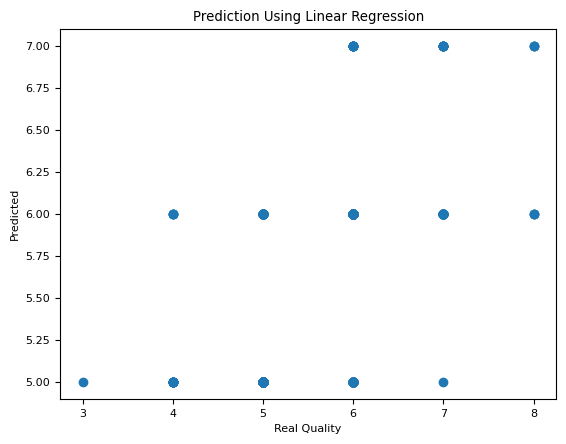

In [35]:
plt.scatter(y_test,y_prediction_lr)
plt.title("Prediction Using Linear Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

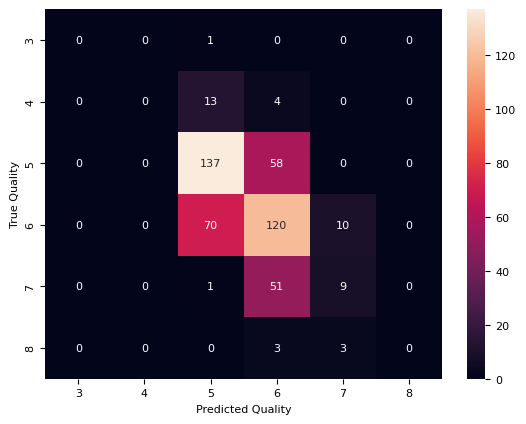

In [36]:
#Linear Regression Model Confussion Matrix
label_aux = plt.subplot()
cm_linear_regression = confusion_matrix(y_test,y_prediction_lr)
cm_lr = pd.DataFrame(cm_linear_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_lr,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

# Decision Tree Regression

In [39]:
#Model fitting and prediction making
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_prediction_dt = regressor.predict(X_test)
y_prediction_dt = np.round(y_prediction_dt)

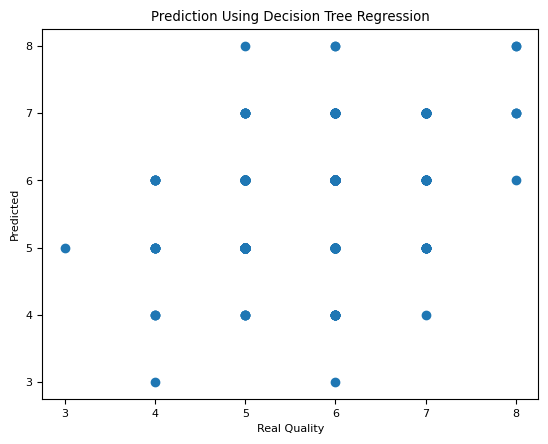

In [40]:
plt.scatter(y_test,y_prediction_dt)
plt.title("Prediction Using Decision Tree Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

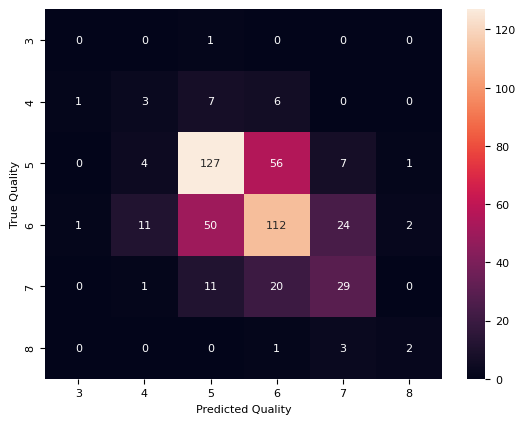

In [41]:
#Decission Tree Regression Model Confussion Matrix
label_aux = plt.subplot()
cm_decision_tree_regression = confusion_matrix(y_test,y_prediction_dt)
cm_dt = pd.DataFrame(cm_decision_tree_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_dt,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

# Random Forest Regression

In [44]:
regressor = RandomForestRegressor(n_estimators=10,random_state = 42)
regressor.fit(X_train, y_train)
y_prediction_rf = regressor.predict(X_test)
y_prediction_rf = np.round(y_prediction_rf)

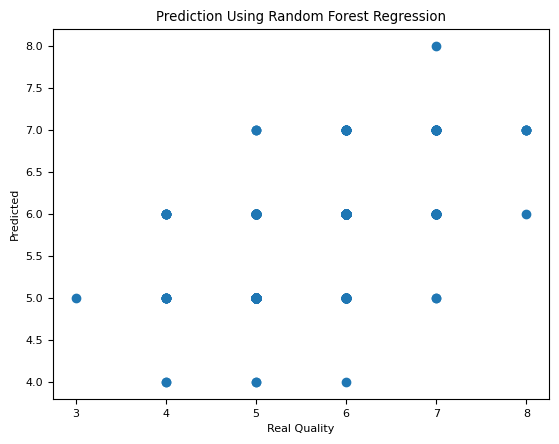

In [45]:
plt.scatter(y_test,y_prediction_rf)
plt.title("Prediction Using Random Forest Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

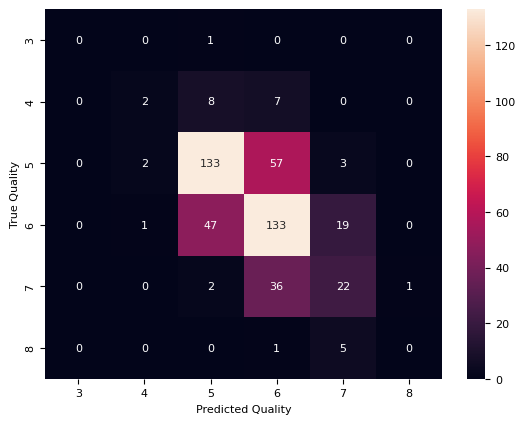

In [46]:
#For the Random Forest Regression Model, confusion matrix
label_aux = plt.subplot()
cm_random_forest_regression = confusion_matrix(y_test,y_prediction_rf)
cm_rf = pd.DataFrame(cm_random_forest_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_rf,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

# Models' RMSE

It's time to assess our models now that they have been prepared. To do this, we'll use RMSE (Root Mean Square Error), which is the residuals' standard deviation (prediction mistakes). The RMSE is a measurement of the dispersion of these residuals, which are a measure of how distant the data points are from the regression line.

# RMSE for Linear Regression

In [52]:
RMSE = sqrt(mean_squared_error(y_test, y_prediction_lr))
print(RMSE)

0.7085783889827104


# RMSE for Decision Tree Regressor

In [53]:
RMSE = sqrt(mean_squared_error(y_test, y_prediction_dt))
print(RMSE)

0.85146931829632


# RMSE for Random Forest Regression

In [54]:
RMSE = sqrt(mean_squared_error(y_test, y_prediction_rf))
print(RMSE)

0.699702317656111


For this situation, Random Forest Regression appears to be the best fitting method. When selecting which regression algorithm is preferable by looking at RMSE, we would rather choose the one with lesser value.

# Improvement of the outcomes through 1-Off Accuracy

Our predictions aren't at all bad, as can be seen from the confusion matrices we displayed above, but in order to "improve" them, we will use a concept known as 1-off accuracy. This idea states that if the difference between our predicted quality and the true quality is 1, we will accept it as a correct prediction.

Now, if the separation between them is equal to 1, we will develop a function that will change our anticipated value into the actual value. After that, we'll plot the updated correlation matrices and use some metrics to gauge the new results.

In [55]:
def one_accuracy(predicted, true):
    i = 0
    for x,y in zip(predicted,true):
        if(abs(x-y)==1):
            predicted[i] = y
        i = i + 1

one_accuracy(y_prediction_lr, y_test)
one_accuracy(y_prediction_dt, y_test)
one_accuracy(y_prediction_rf, y_test)

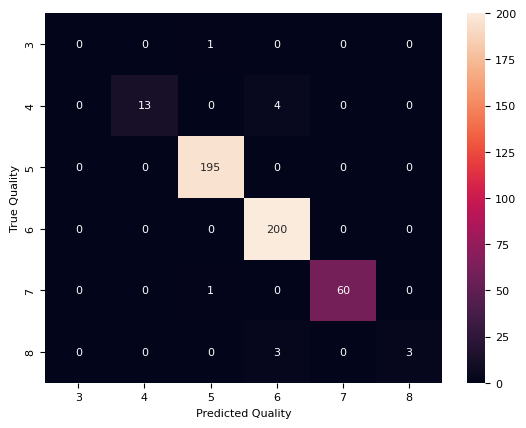

In [56]:
#Linear Regression Model Confussion Matrix
label_aux = plt.subplot()
cm_linear_regression = confusion_matrix(y_test,y_prediction_lr)
cm_lr = pd.DataFrame(cm_linear_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_lr,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

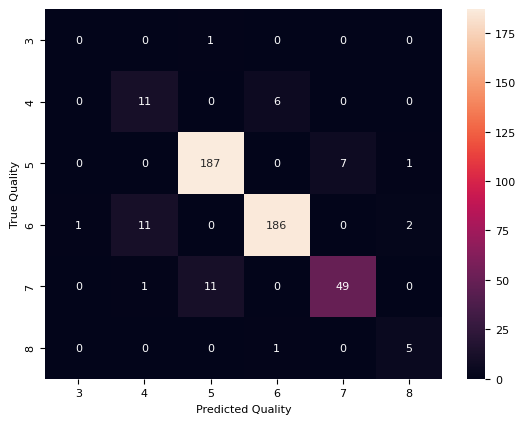

In [57]:
#Decission Tree Regression Model Confussion Matrix
label_aux = plt.subplot()
cm_decision_tree_regression = confusion_matrix(y_test,y_prediction_dt)
cm_dt = pd.DataFrame(cm_decision_tree_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_dt,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

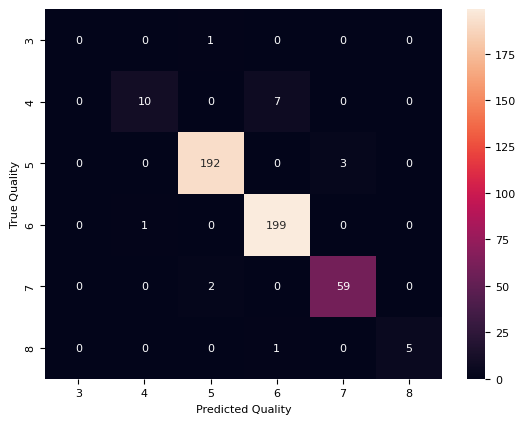

In [58]:
#For the Random Forest Regression Model, confusion matrix
label_aux = plt.subplot()
cm_random_forest_regression = confusion_matrix(y_test,y_prediction_rf)
cm_rf = pd.DataFrame(cm_random_forest_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_rf,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

As we can see, our findings are much more impressive than those we previously attained. As a result, we will now determine the updated RMSE for each of the three models.

In [59]:
RMSE_lr = sqrt(mean_squared_error(y_test, y_prediction_lr))
print("RMSE for new improved Linear Regression is: " + str(RMSE_lr) + "\n")
RMSE_dt = sqrt(mean_squared_error(y_test, y_prediction_dt))
print("RMSE for new improved Decision Tree Regression is: " + str(RMSE_dt) + "\n")
RMSE_rf = sqrt(mean_squared_error(y_test, y_prediction_rf))
print("RMSE for new improved Random Forest Regression is: " + str(RMSE_rf) + "\n")

RMSE for new improved Linear Regression is: 0.27386127875258304

RMSE for new improved Decision Tree Regression is: 0.6174544517614234

RMSE for new improved Random Forest Regression is: 0.3535533905932738



# Utilising F1 Score, Precision, and Recall to Test Our Models

We are creating a table that displays the precision, recall, and f1score of our three regressor models for future testing.

In [70]:
warnings.filterwarnings('ignore')
ptbl = PrettyTable()
ptbl.field_names = ["Regressor Model", "Precision", "Recall", "F1Score"]
ptbl.add_row(["Linear", precision_score(y_test, y_prediction_lr, average = 'weighted'),
           recall_score(y_test, y_prediction_lr, average = 'weighted'), f1_score(y_test, y_prediction_lr, average = 'weighted')])
ptbl.add_row(["Decision Tree", precision_score(y_test, y_prediction_dt, average = 'weighted'), recall_score(y_test, y_prediction_dt, average = 'weighted'), 
           f1_score(y_test, y_prediction_dt, average = 'weighted')])
ptbl.add_row(["Random Forest", precision_score(y_test, y_prediction_rf, average = 'weighted'), recall_score(y_test, y_prediction_rf, average = 'weighted'),
           f1_score(y_test, y_prediction_rf, average = 'weighted')])
print(ptbl)

+-----------------+--------------------+---------+--------------------+
| Regressor Model |     Precision      |  Recall |      F1Score       |
+-----------------+--------------------+---------+--------------------+
|      Linear     | 0.9797021240507777 | 0.98125 | 0.9787385410477942 |
|  Decision Tree  | 0.9192557391716599 |  0.9125 | 0.9148838152533492 |
|  Random Forest  | 0.9661947165672622 | 0.96875 | 0.9660315070376045 |
+-----------------+--------------------+---------+--------------------+


# Observations

These are some things we can say about this problem and its solution after obtaining all the results through our models and 
plots:

While having good and bad wines seems less possible, most wines receive a quality rating of five or six. Excellent wines (>8) 
don't appear to be represented in this database.

Regression algorithms have difficulty making precise predictions since we have known for a long time that there are weak 
connections between characteristics and quality. Accordingly, the qualities that correspond most positively are those related 
to alcohol, sulphates, and citric acid, while the trait that correlates least favourably is volatile acidity.

We achieve substantially better outcomes when we apply the idea of 1-off Accuracy.

The models that appear to fit this problem the best when using regression are Random Forest and Linear Regression.

Since there are just six different quality values in this dataset, it would be sensible to approach this problem as a 
multiclass classification problem (we may utilise the quality grouping strategy we used earlier). If anything, the results 
may even be better.

# Exploration of Data

After ensuring that our dataset is sound and "ready to go," we will further investigate the data and plot significant information to aid in our examination of the behaviour and correlation of the features. Additionally, in order to better comprehend the dataset, we will attempt to collect as much information as we can from it.

Now that we are aware that "quality" is our objective variable, we will plot some data related to it. Let's examine the values this column includes and their frequency.

<AxesSubplot:xlabel='quality', ylabel='count'>

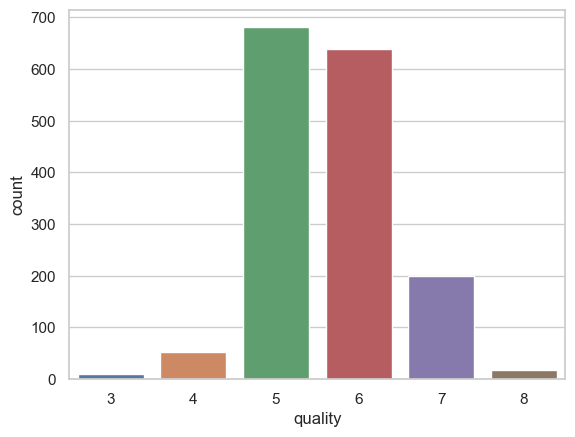

In [22]:
sns.set(style="whitegrid")

sns.countplot('quality', data=df)

In [23]:
# storing input data in a list of column
col = df.columns
print(col)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


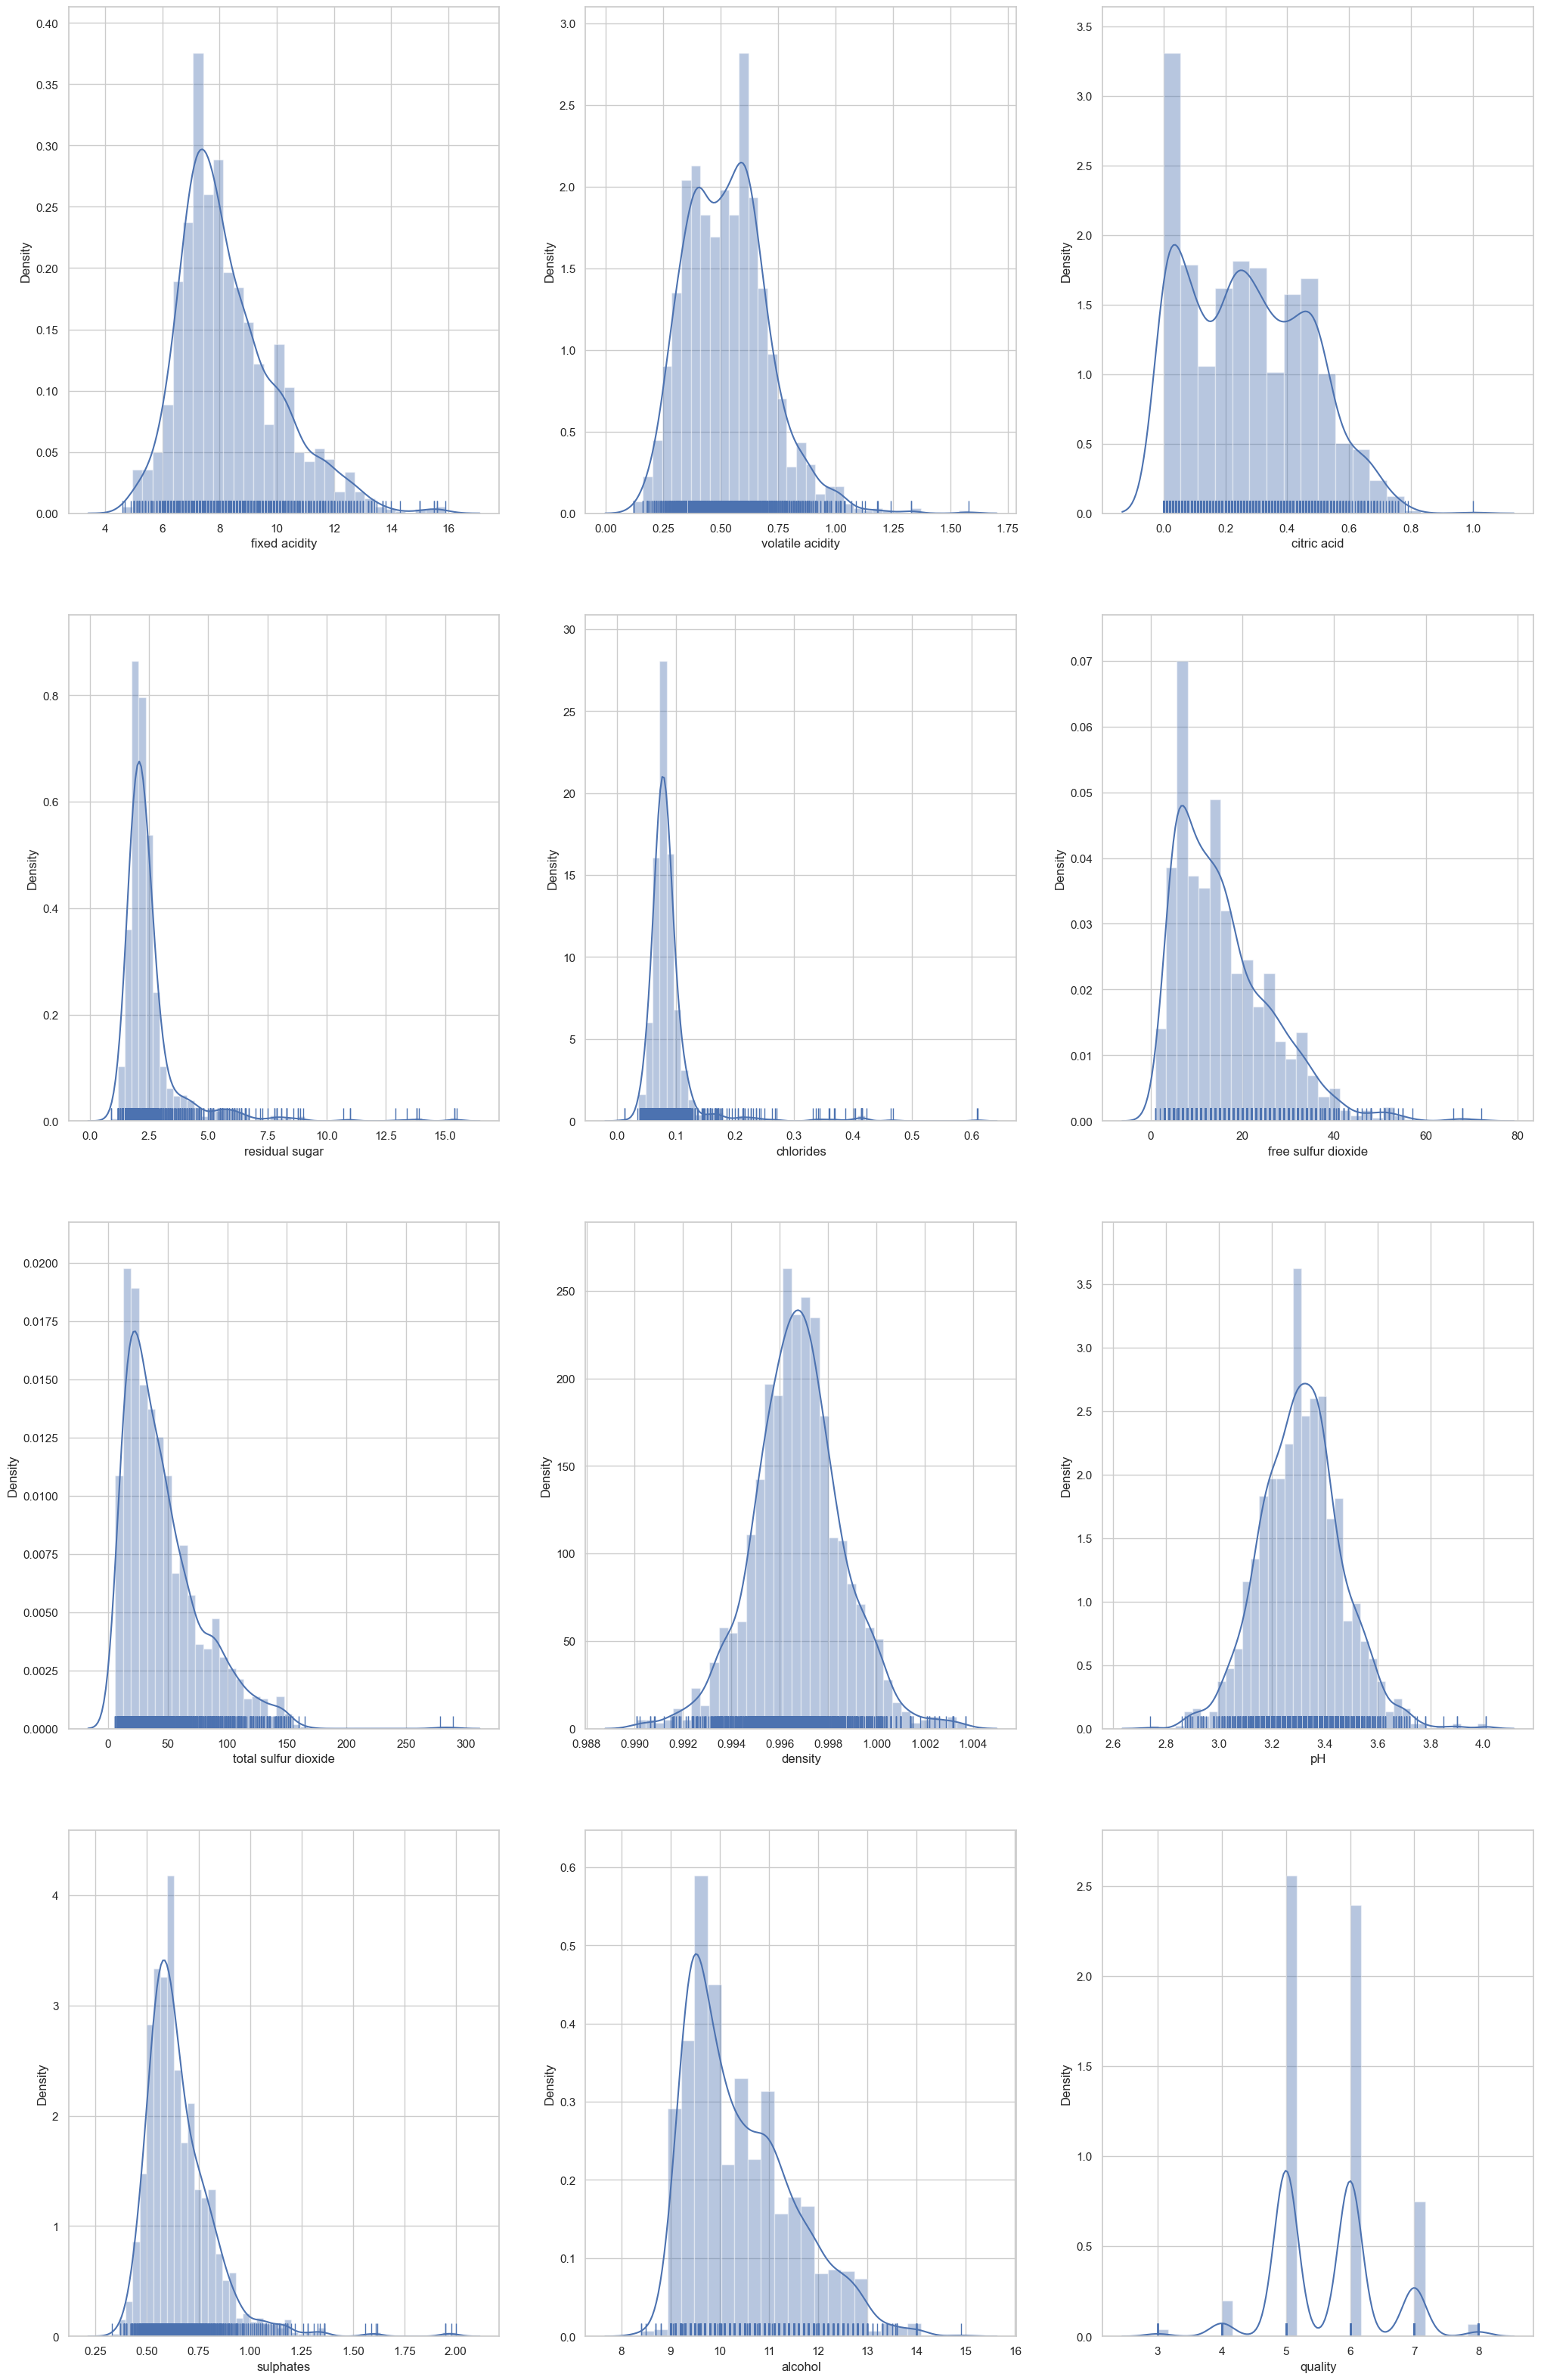

In [24]:
fig, ax = plt.subplots(4, 3, figsize=(25, 40))
k = 0

for i in range(4):
 for j in range(3):

    sns.distplot(df[col[k]], rug=True, axlabel=col[k], ax=ax[i][j])
    k += 1


Positive skewness characterises most of the traits.

Certain elements are multimodal.

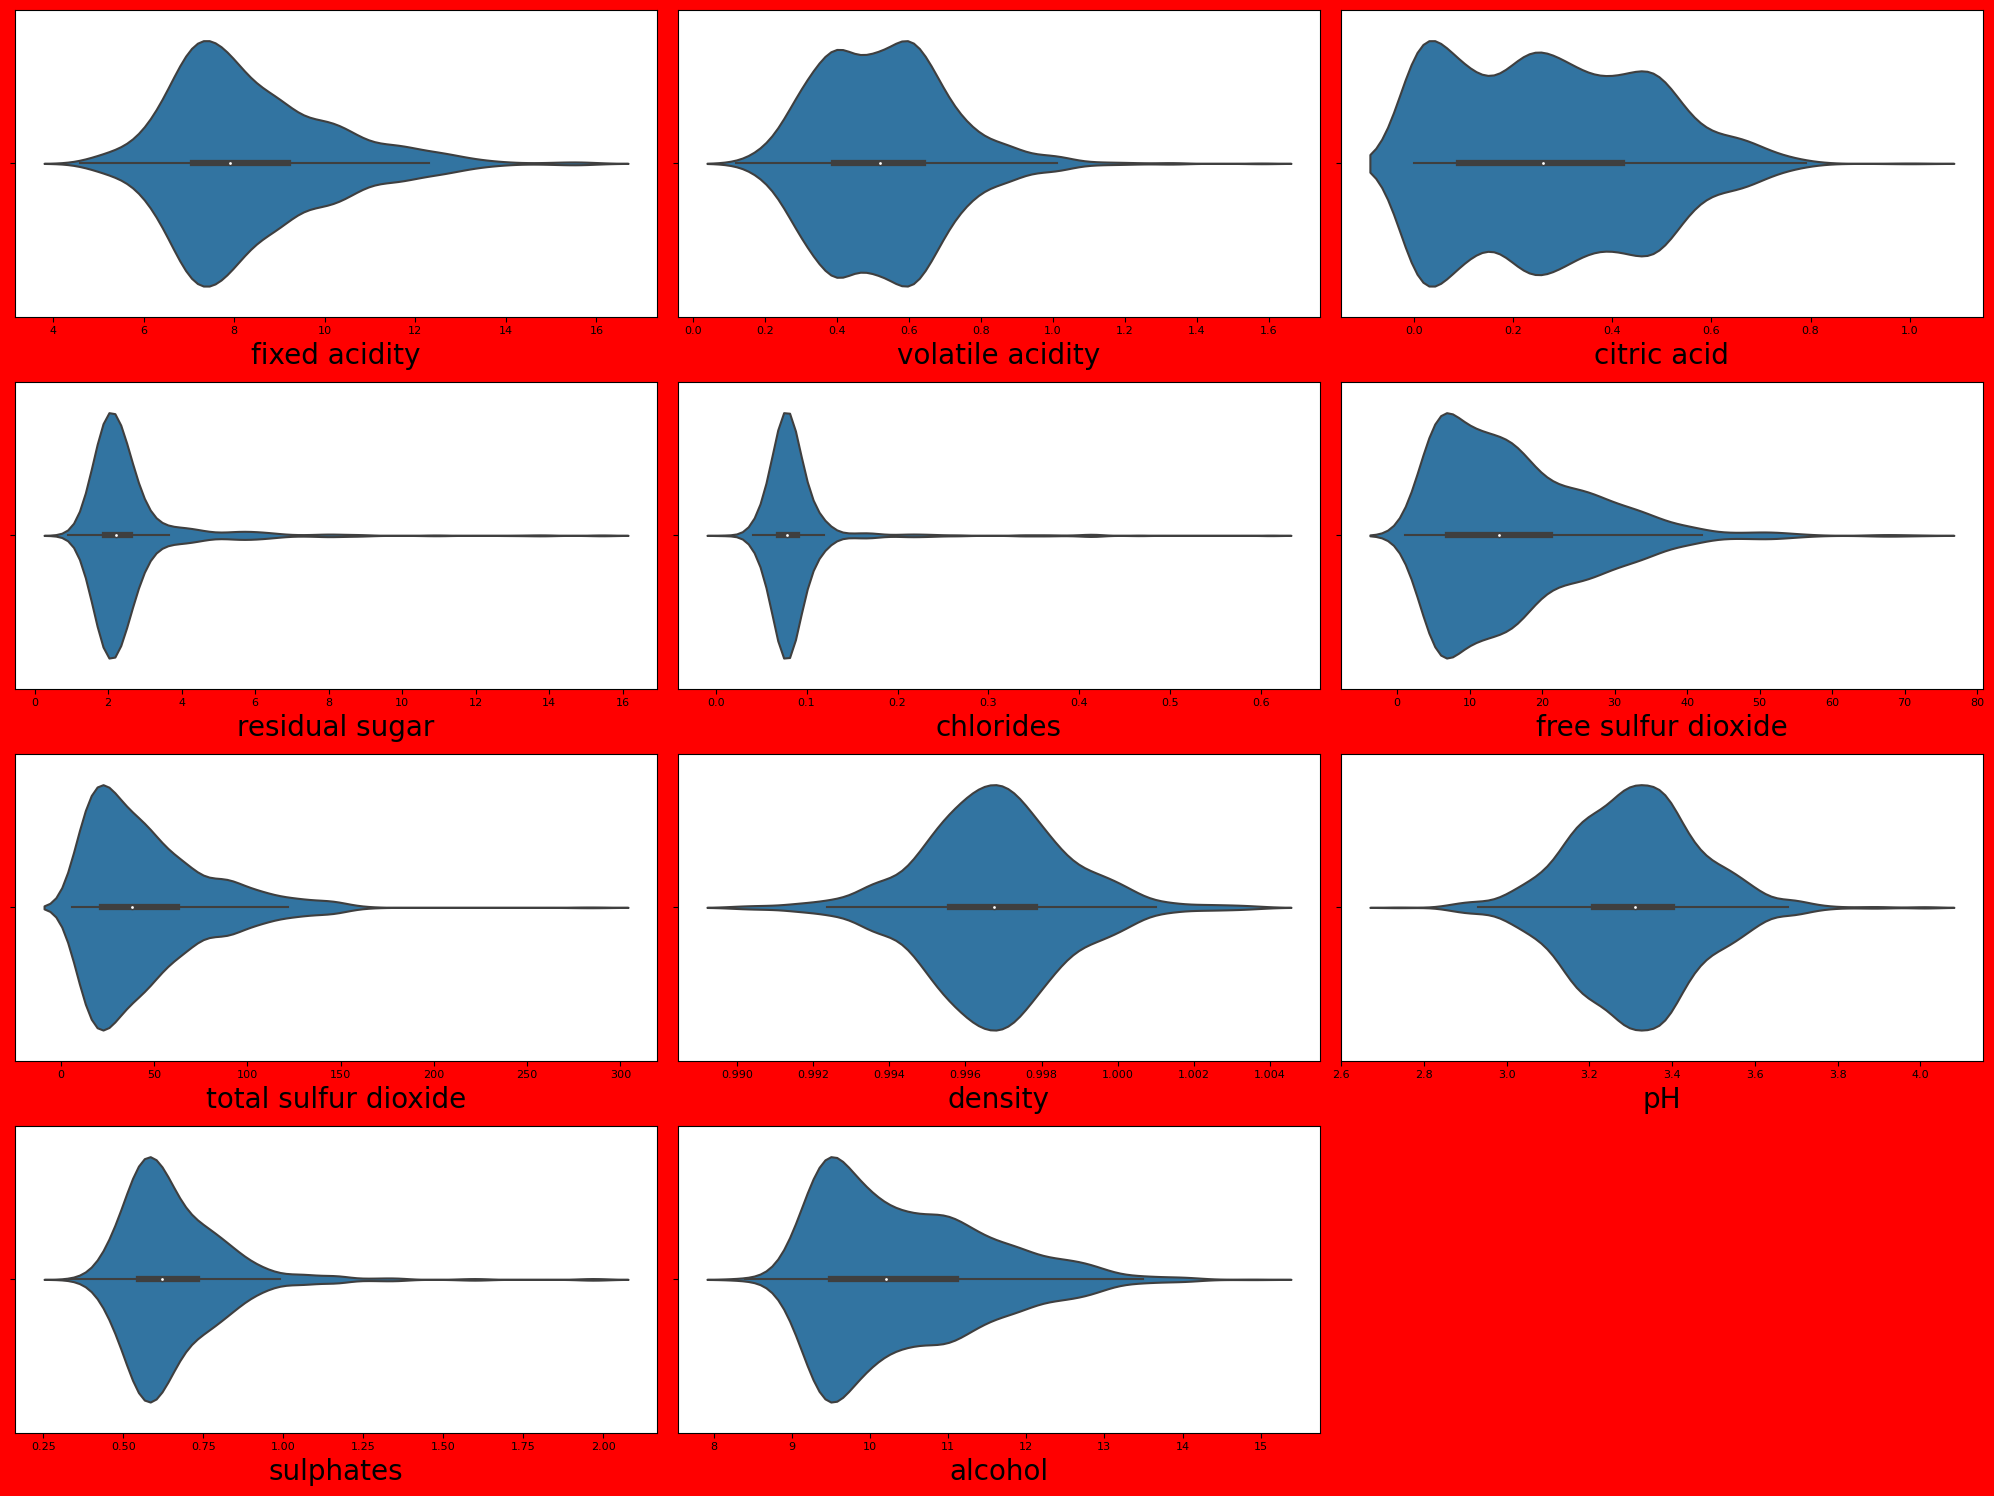

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15), facecolor = 'red')
plotnumber = 1 #this is an initiator

for column in df:
    if plotnumber <12: #here 12 is the number of features
        ax = plt.subplot (4,3, plotnumber)
        sns.violinplot (df[column], hue_order = "yellow")
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()

# Looking for anomalies

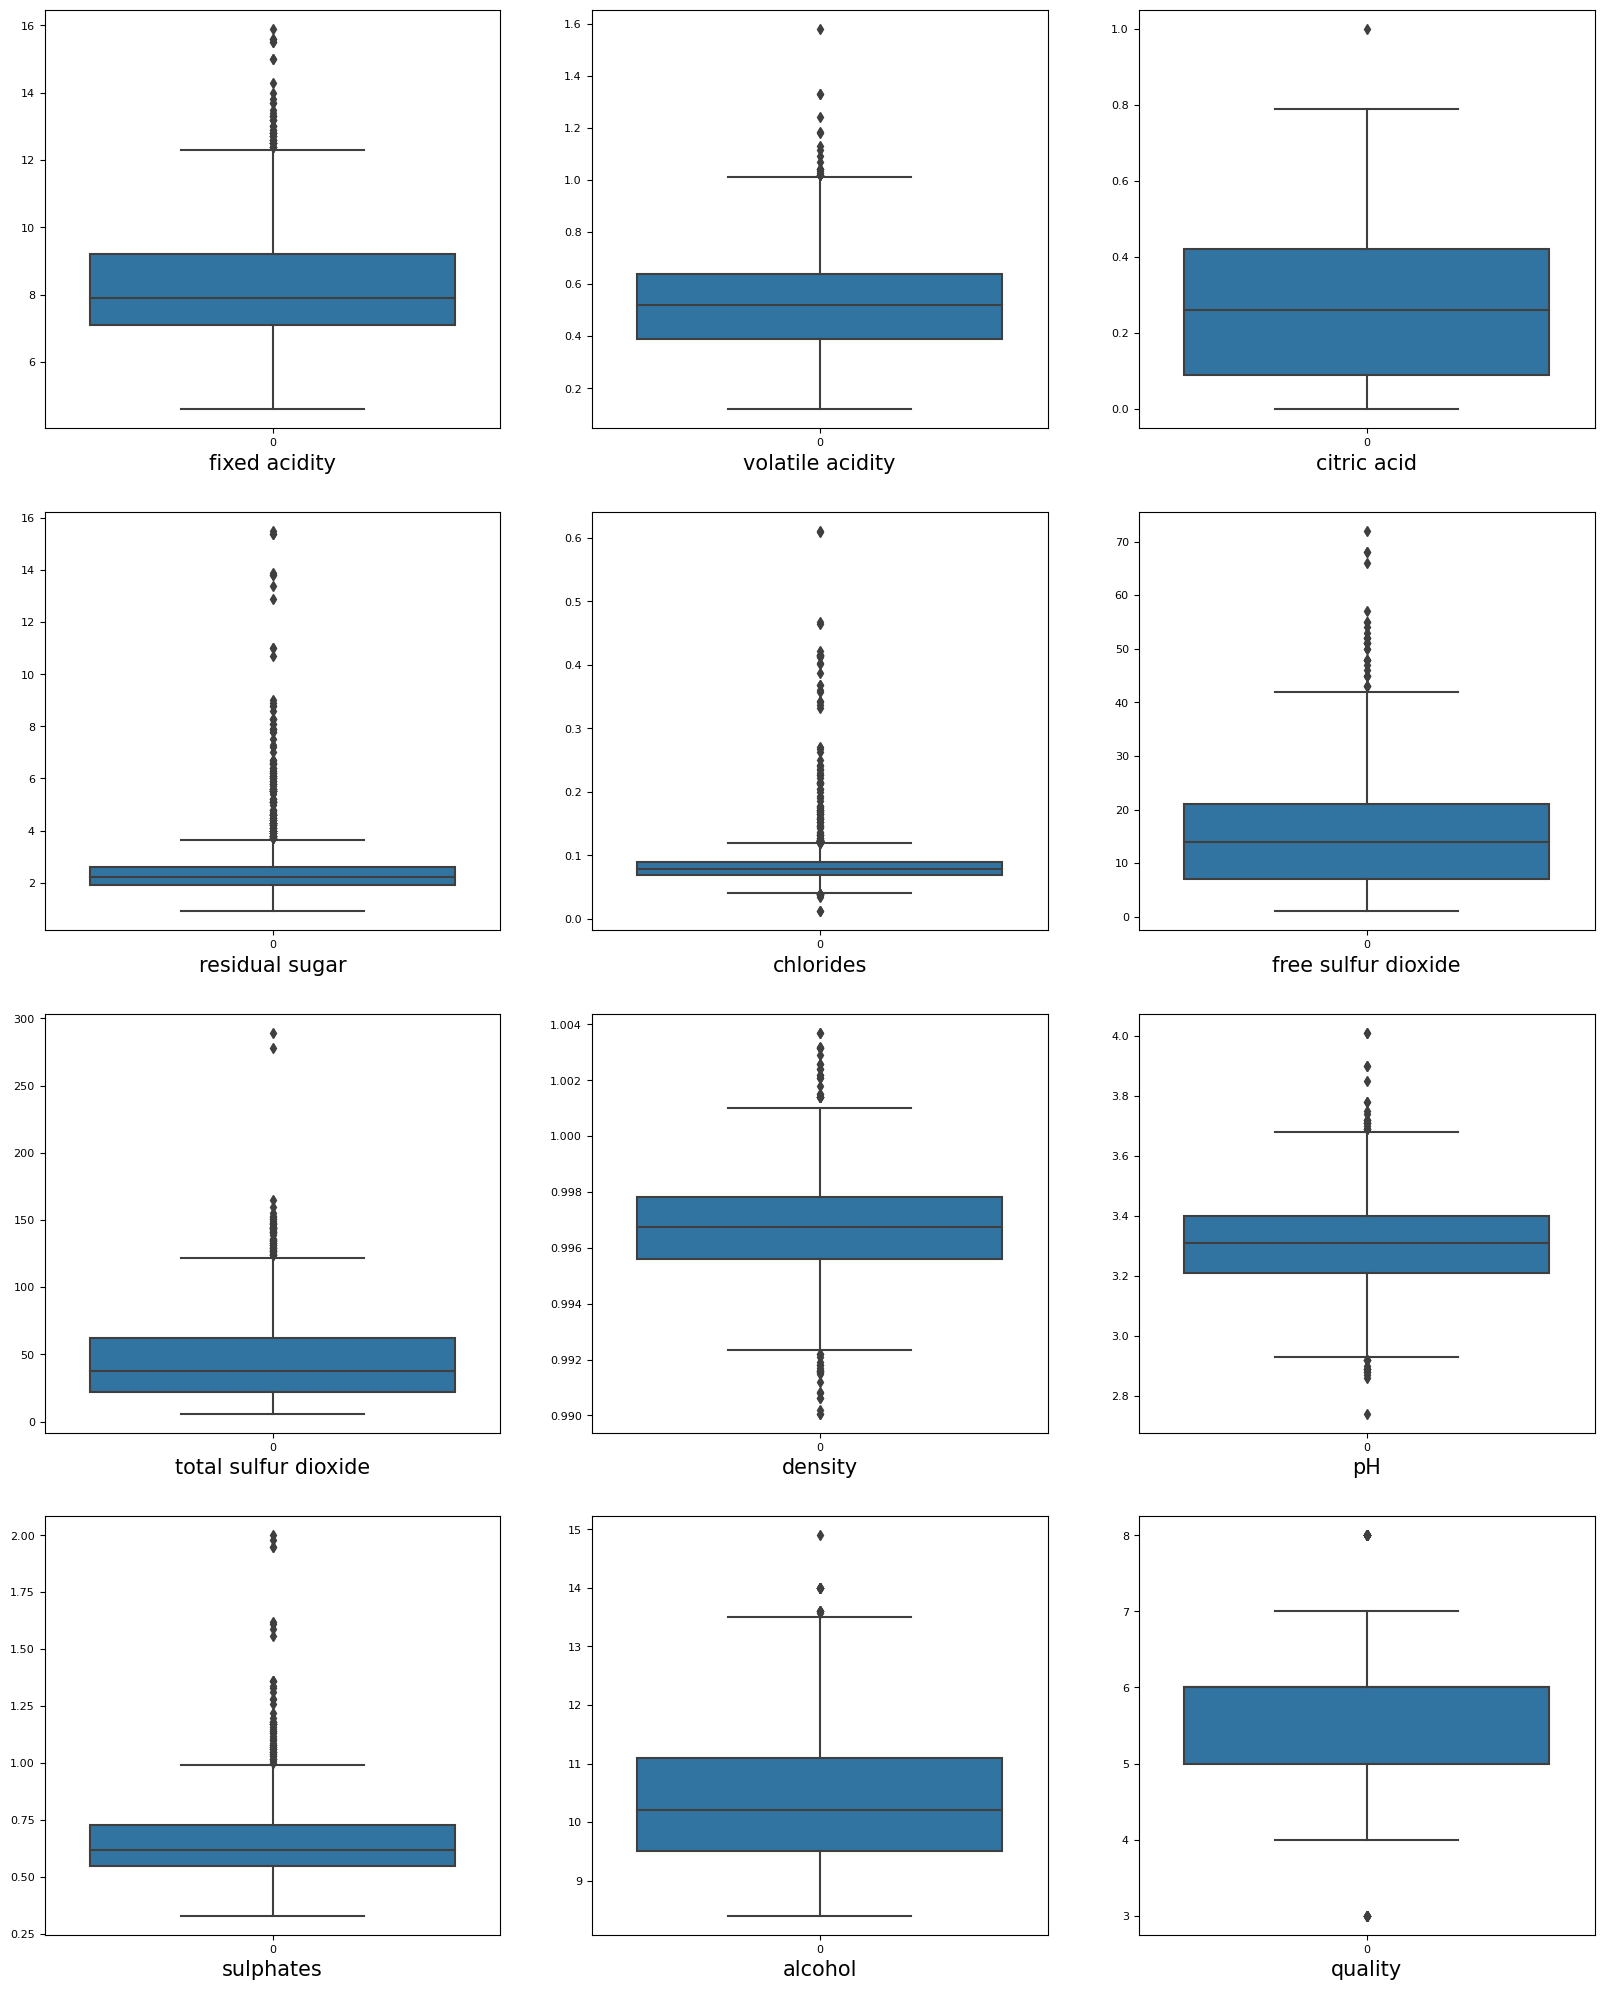

In [77]:
plt.figure (figsize = (20,25))
graph = 1 #Initiator

for column in df:
    if graph <=12: 
        plt.subplot (4,3, graph)
        ax = sns.boxplot (data = df[column],)
        plt.xlabel (column, fontsize = 15)
    graph +=1
plt.show()

# Some of the columns have a significant rightward skew. So, in order to obtain a normal distribution, applying log transform.


In [25]:
# log transformation application
df['residual sugar'] = df['residual sugar'].apply(np.log)
df['chlorides'] = df['chlorides'].apply(np.log)
df['free sulfur dioxide'] = df['free sulfur dioxide'].apply(np.log)
df['total sulfur dioxide'] = df['total sulfur dioxide'].apply(np.log)
df['sulphates'] = df['sulphates'].apply(np.log)
df['alcohol'] = df['alcohol'].apply(np.log)

# Following the application of log transformation

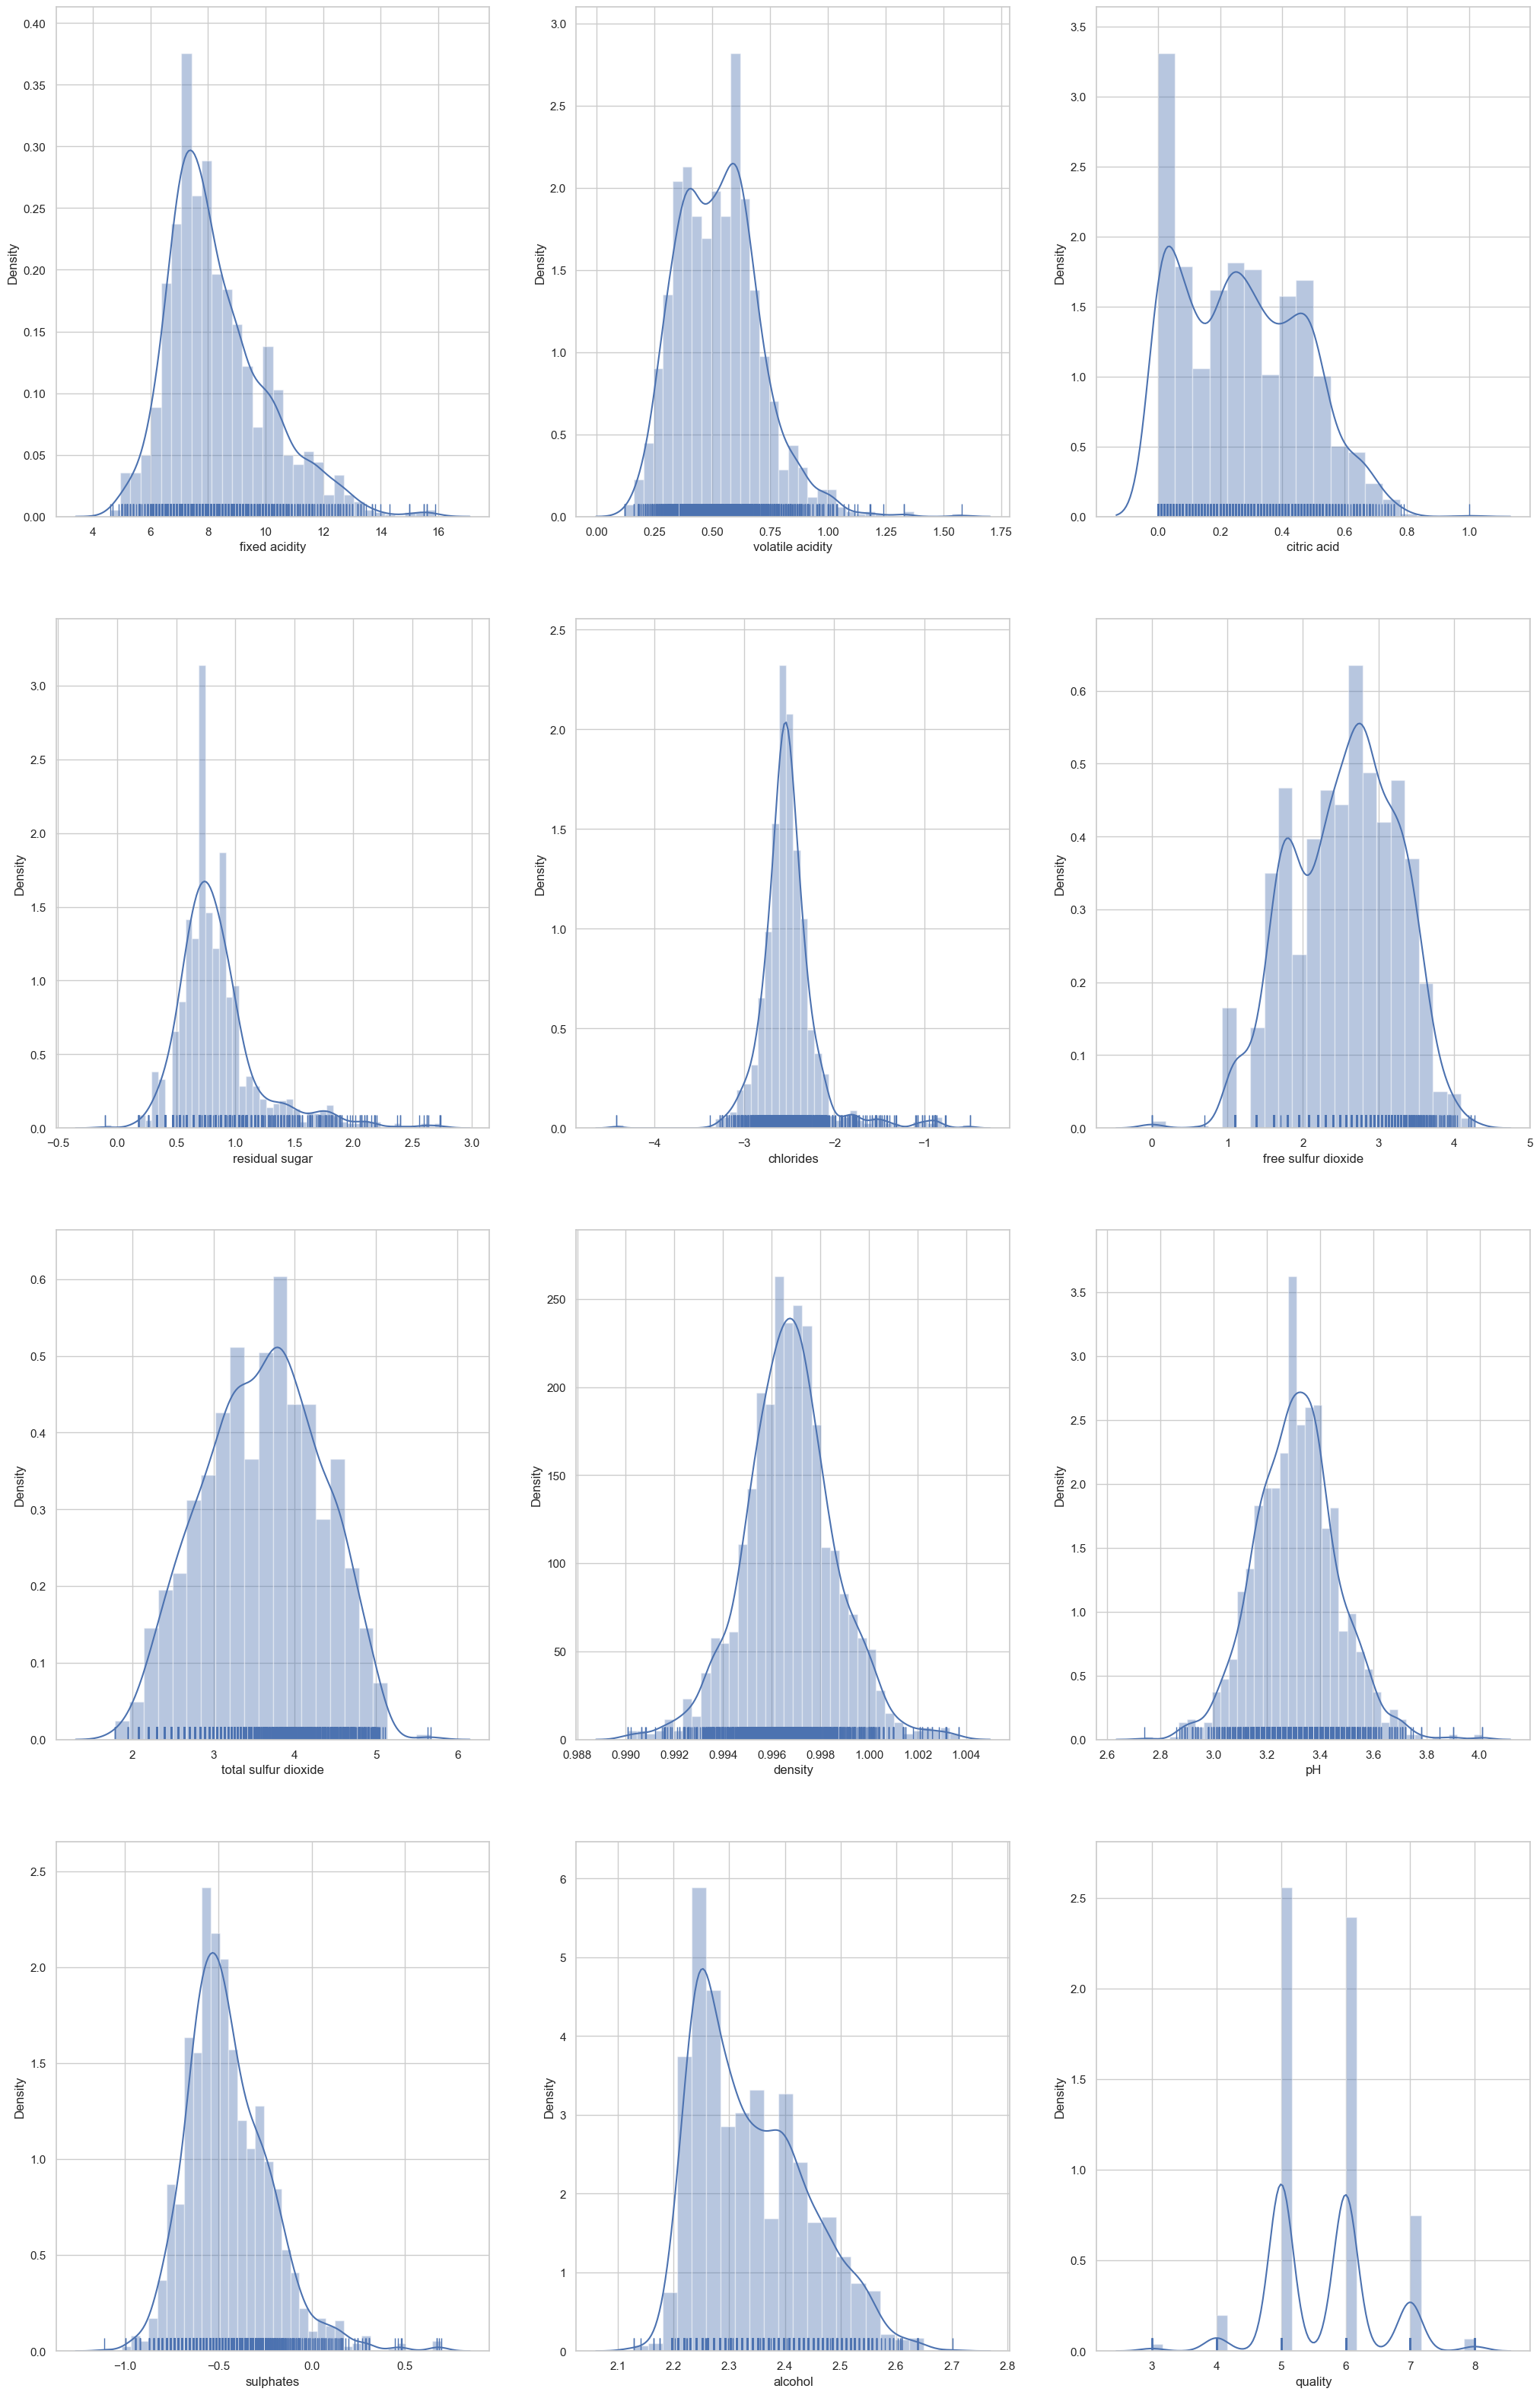

In [26]:
fig, ax = plt.subplots(4, 3, figsize=(25, 40))
k = 0

for i in range(4):
  for j in range(3):

    sns.distplot(df[col[k]], rug=True, axlabel=col[k], ax=ax[i][j])
    k += 1

# Creating a train and test data split.

In [40]:
from sklearn.model_selection import train_test_split

X = new_df.drop('quality',axis=1) 
y = new_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Our Wine Quality Prediction model Training.

In [41]:
param = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000]}

grid_rf = GridSearchCV(RandomForestClassifier(),param,scoring='accuracy',cv=10,)
grid_rf.fit(X_train, y_train)

print('Best parameters --> ', grid_rf.best_params_)

# Wine Quality Prediction
pred = grid_rf.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

Best parameters -->  {'n_estimators': 700}
[[48 20]
 [ 7 56]]


              precision    recall  f1-score   support

           0       0.87      0.71      0.78        68
           1       0.74      0.89      0.81        63

    accuracy                           0.79       131
   macro avg       0.80      0.80      0.79       131
weighted avg       0.81      0.79      0.79       131



0.7938931297709924


--Here, I've combined GridSearchCV with Random Forest to get the 'n_estimators' parameter's ideal value.

--Our final accuracy was 79.3%, which is excellent considering the limited dataset.

In [42]:

# output and input feature correlation
df.corr()['quality'].sort_values(ascending=False)[1:]

alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [43]:
#creating an output feature vector (y) and an input feature vector (X) for each

X = df.drop('quality', axis = 1)
y = df['quality']

In [44]:
# division of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=21)

In [35]:
# normalization of the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# appliation of machine learning

In [47]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [48]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [86]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()

# matching the training set's data to the model
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.294137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1014
[LightGBM] [Info] Number of data points in the train set: 1199, number of used features: 11
[LightGBM] [Info] Start training from score -5.009802
[LightGBM] [Info] Start training from score -3.505724
[LightGBM] [Info] Start training from score -0.829662
[LightGBM] [Info] Start training from score -0.934385
[LightGBM] [Info] Start training from score -2.105637
[LightGBM] [Info] Start training from score -4.381193
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

LGBMClassifier()

In [50]:
# Estimating the output
prediction = lgbm.predict(X_test)

lgbm_acc = accuracy_score(y_test, prediction)
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Accuracy Score of Testing  Data is {lgbm_acc}")

Accuracy Score of Training Data is 1.0
Accuracy Score of Testing  Data is 0.7


In [51]:
print("\n Train Data: LGBM_Confusion Matrix:\n ")
print(confusion_matrix(y_train, lgbm.predict(X_train)))

print("\n Train Data: LGBM_Classification Report:\n ")
print(classification_report(y_train, lgbm.predict(X_train)))


 Train Data: LGBM_Confusion Matrix:
 
[[  8   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 523   0   0   0]
 [  0   0   0 471   0   0]
 [  0   0   0   0 146   0]
 [  0   0   0   0   0  15]]

 Train Data: LGBM_Classification Report:
 
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       523
           6       1.00      1.00      1.00       471
           7       1.00      1.00      1.00       146
           8       1.00      1.00      1.00        15

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199



In [64]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV


rf = RandomForestClassifier()
parameters = {
    'min_samples_split' : [2, 3, 4, 5],
    'max_depth' : [10, 15, 20, 25],
    'n_estimators' : [90, 100, 110, 120]
}



grid_search = GridSearchCV(rf, parameters, cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, 25],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [90, 100, 110, 120]})

In [65]:
#top parameters 
grid_search.best_params_

{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 110}

In [66]:
grid_search.best_score_

0.6872128851540616

In [67]:
rf = RandomForestClassifier(max_depth = 15, min_samples_split = 3, n_estimators = 100)
rf.fit(X_train, y_train)

prediction = rf.predict(X_test)

rf_acc = accuracy_score(y_test, prediction)

print(f"Accuracy Score of Training Data is {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Accuracy Score of Testing Data is {rf_acc}\n")

Accuracy Score of Training Data is 0.9983319432860718
Accuracy Score of Testing Data is 0.6925



In [68]:
print("\n Train Data: RandomForestClassifier_Confusion Matrix:\n ")
print(confusion_matrix(y_train, rf.predict(X_train)))

print("\n Train Data: RandomForestClassifier_Classification Report:\n ")
print(classification_report(y_train, rf.predict(X_train)))


 Train Data: RandomForestClassifier_Confusion Matrix:
 
[[  8   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 523   0   0   0]
 [  0   0   0 471   0   0]
 [  0   0   2   0 144   0]
 [  0   0   0   0   0  15]]

 Train Data: RandomForestClassifier_Classification Report:
 
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       523
           6       1.00      1.00      1.00       471
           7       1.00      0.99      0.99       146
           8       1.00      1.00      1.00        15

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199



In [69]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
parameters = {
    'min_samples_split' : [2, 3, 4, 5, 6],
    'min_samples_leaf' : [1, 2, 3, 4],
    'n_estimators' : [80, 90, 100, 110, 120]
}

grid_search = GridSearchCV(gb, parameters, cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [80, 90, 100, 110, 120]})

In [70]:
#top parameters 
grid_search.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 110}

In [71]:
grid_search.best_score_

0.658032212885154

In [72]:
gb = GradientBoostingClassifier(min_samples_leaf = 1, min_samples_split = 6, n_estimators = 120)
gb.fit(X_train, y_train)

prediction = gb.predict(X_test)

gb_acc = accuracy_score(y_test, prediction)

print(f"Accuracy Score of Training Data is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Accuracy Score of Testing Data is {gb_acc}\n")

Accuracy Score of Training Data is 0.9224353628023353
Accuracy Score of Testing Data is 0.65



In [73]:
print("\n Train Data: GradientBoostingClassifier_Confusion Matrix:\n ")
print(confusion_matrix(y_train, gb.predict(X_train)))

print("\n Train Data: GradientBoostingClassifier_Classification Report:\n ")
print(classification_report(y_train, gb.predict(X_train)))


 Train Data: GradientBoostingClassifier_Confusion Matrix:
 
[[  8   0   0   0   0   0]
 [  0  34   0   2   0   0]
 [  0   0 492  30   1   0]
 [  0   0  42 429   0   0]
 [  0   0   3  15 128   0]
 [  0   0   0   0   0  15]]

 Train Data: GradientBoostingClassifier_Classification Report:
 
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       1.00      0.94      0.97        36
           5       0.92      0.94      0.93       523
           6       0.90      0.91      0.91       471
           7       0.99      0.88      0.93       146
           8       1.00      1.00      1.00        15

    accuracy                           0.92      1199
   macro avg       0.97      0.95      0.96      1199
weighted avg       0.92      0.92      0.92      1199



In [74]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

prediction = etc.predict(X_test)

etc_acc = accuracy_score(y_test, prediction)

print(f"Accuracy Score of Training Data is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Accuracy Score of Testing Data is {etc_acc} \n")

Accuracy Score of Training Data is 1.0
Accuracy Score of Testing Data is 0.6725 



In [75]:
print("\n Train Data: ExtraTreesClassifier_Confusion Matrix:\n ")
print(confusion_matrix(y_train, etc.predict(X_train)))

print("\n Train Data: ExtraTreesClassifier_Classification Report:\n ")
print(classification_report(y_train, etc.predict(X_train)))


 Train Data: ExtraTreesClassifier_Confusion Matrix:
 
[[  8   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 523   0   0   0]
 [  0   0   0 471   0   0]
 [  0   0   0   0 146   0]
 [  0   0   0   0   0  15]]

 Train Data: ExtraTreesClassifier_Classification Report:
 
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       523
           6       1.00      1.00      1.00       471
           7       1.00      1.00      1.00       146
           8       1.00      1.00      1.00        15

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199



In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
parameters = {
    'n_neighbors' : [5, 10, 15],
    'weights' : ['distance'],
    'leaf_size' : [20, 25, 30, 35]
}

grid_search = GridSearchCV(knn, parameters, cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [20, 25, 30, 35],
                         'n_neighbors': [5, 10, 15], 'weights': ['distance']})

In [77]:
grid_search.best_params_

{'leaf_size': 20, 'n_neighbors': 15, 'weights': 'distance'}

In [78]:
grid_search.best_score_

0.6146288515406162

In [79]:
knn = KNeighborsClassifier(n_neighbors = 15, leaf_size = 20, weights = 'distance')
knn.fit(X_train, y_train)

prediction = knn.predict(X_test)

knn_acc = accuracy_score(y_test, prediction)

print(f"Accuracy Score of Training Data is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Accuracy Score of Testing Data is {knn_acc}\n")

Accuracy Score of Training Data is 1.0
Accuracy Score of Testing Data is 0.6025



In [80]:
print("\n Train Data: KNN_Confusion Matrix:\n ")
print(confusion_matrix(y_train, knn.predict(X_train)))

print("\n Train Data: KNN_Classification Report:\n ")
print(classification_report(y_train, knn.predict(X_train)))


 Train Data: KNN_Confusion Matrix:
 
[[  8   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 523   0   0   0]
 [  0   0   0 471   0   0]
 [  0   0   0   0 146   0]
 [  0   0   0   0   0  15]]

 Train Data: KNN_Classification Report:
 
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       523
           6       1.00      1.00      1.00       471
           7       1.00      1.00      1.00       146
           8       1.00      1.00      1.00        15

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199



# Plotting the accuracy of each ML model mentioned above

In [81]:
models = pd.DataFrame({
    'Model' : ['LGBM',  'RandomForestClassifier', 'Gradient Boosting', 
               'Extra Tree', 'KNN'
              ],
    'Score' : [lgbm_acc, rf_acc, gb_acc, etc_acc, knn_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,LGBM,0.7000
1,RandomForestClassifier,0.6925
3,Extra Tree,0.6725
2,Gradient Boosting,0.6500
4,KNN,0.6025


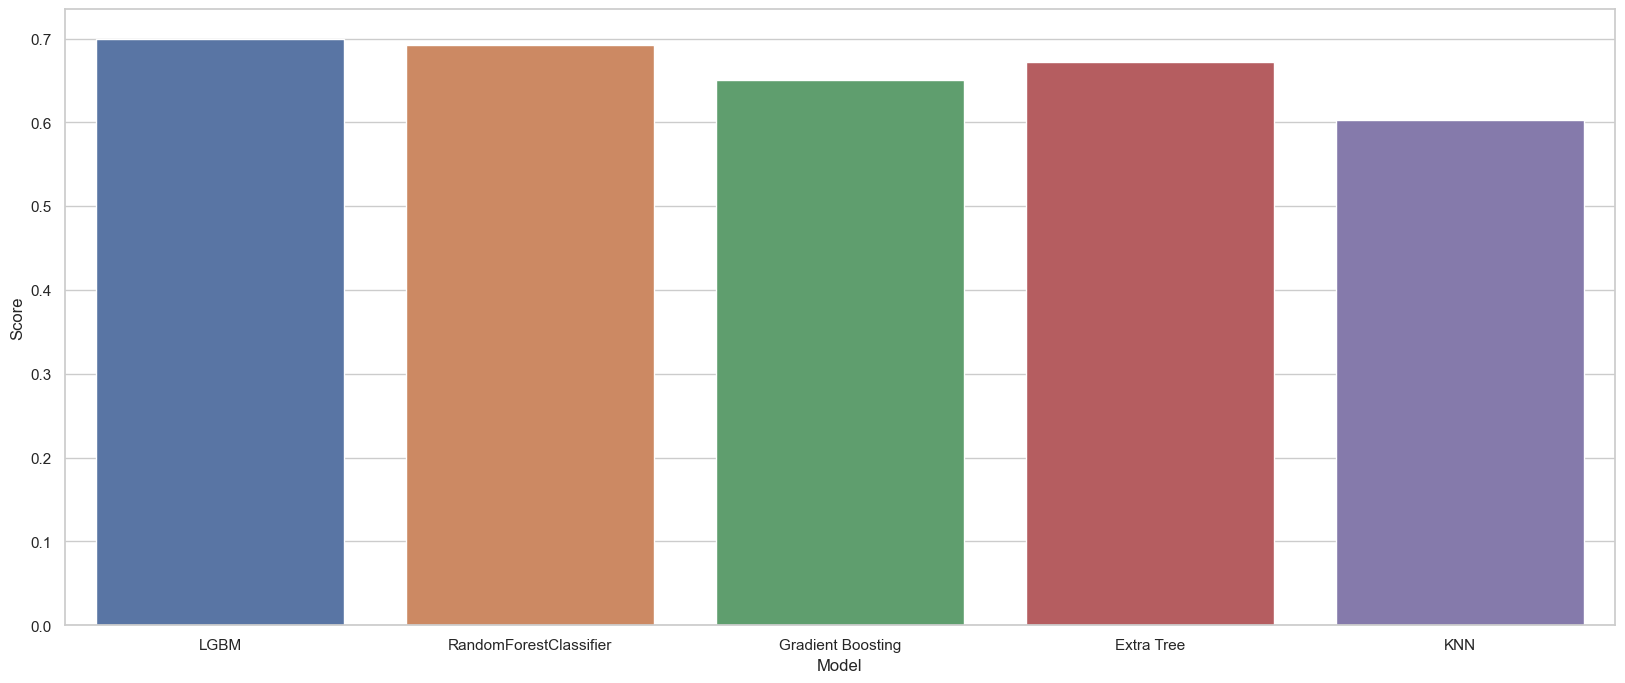

In [82]:
plt.figure(figsize = (20, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()